## Лабораторная работа 2
### Волноводно - щелевые антенны

_Построение теоретических графиков по рассчитанным числам в math_cad_

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Text(0, 0.5, 'Ширина луча по половинной мощности')

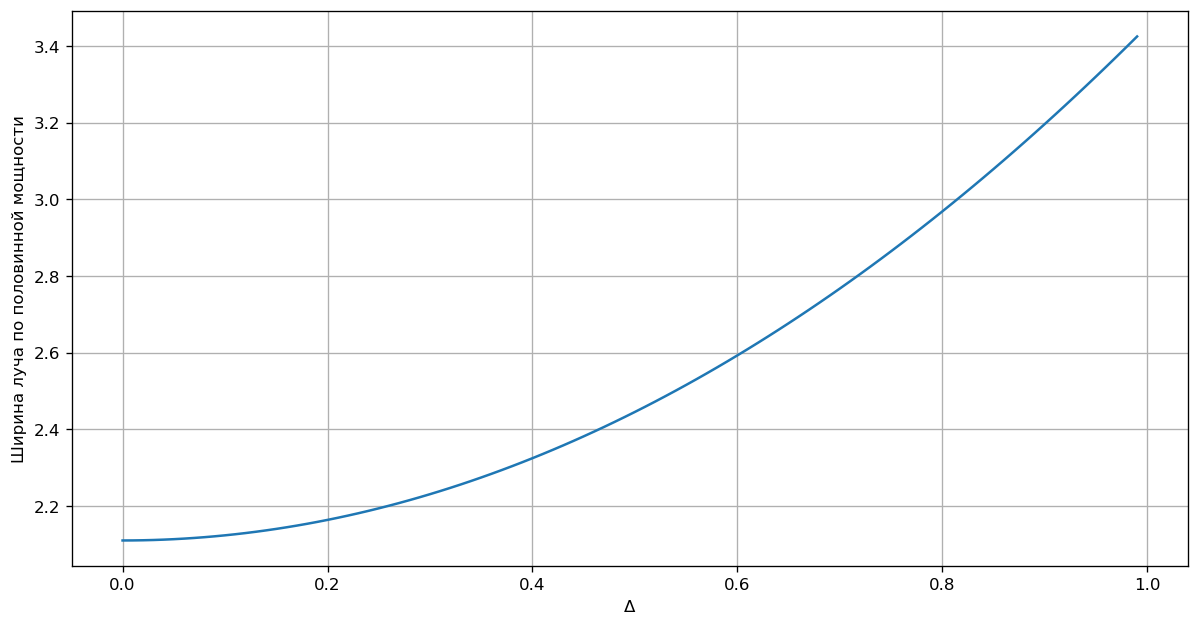

In [22]:
delta = np.arange(0, 1, 0.01)
lmb = 3.2 * 10e-2 # длина волны
L = 0.135
delta_theta = ((51 * np.pi/180) * lmb * (1 + 0.636 * delta**2) )/(L * np.sin(np.pi/2))
plt.figure(figsize=(12, 6),dpi = 120)
# График сигнала во временной области
plt.grid(True)
plt.plot(delta, delta_theta)
plt.xlabel('\u0394')
plt.ylabel('Ширина луча по половинной мощности')

Text(0, 0.5, 'Ширина луча по половинной мощности')

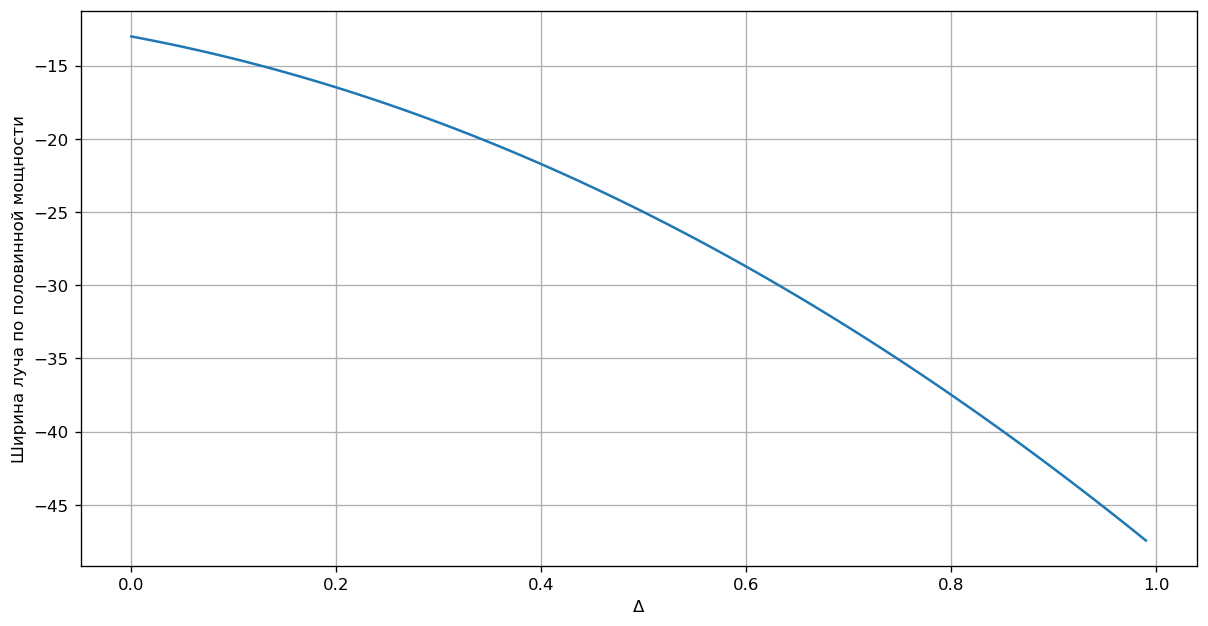

In [23]:
UBL = -13 - 13*delta - 22*delta**2
plt.figure(figsize=(12, 6),dpi = 120)
# График сигнала во временной области
plt.grid(True)
plt.plot(delta, UBL)
plt.xlabel('\u0394')
plt.ylabel('Ширина луча по половинной мощности')

Построим ДН элементарного излучателя при 𝑁 =7,𝑑 =22.5 мм 
Длина волны в волноводе:

C:\Users\User\AppData\Local\Temp\ipykernel_16696\1021029086.py:15: RuntimeWarning: divide by zero encountered in divide
  F1_theta_1 = np.where(sin_theta != 0, cos_theta / sin_theta, 0.0001)  # или np.nan, если хотите другой


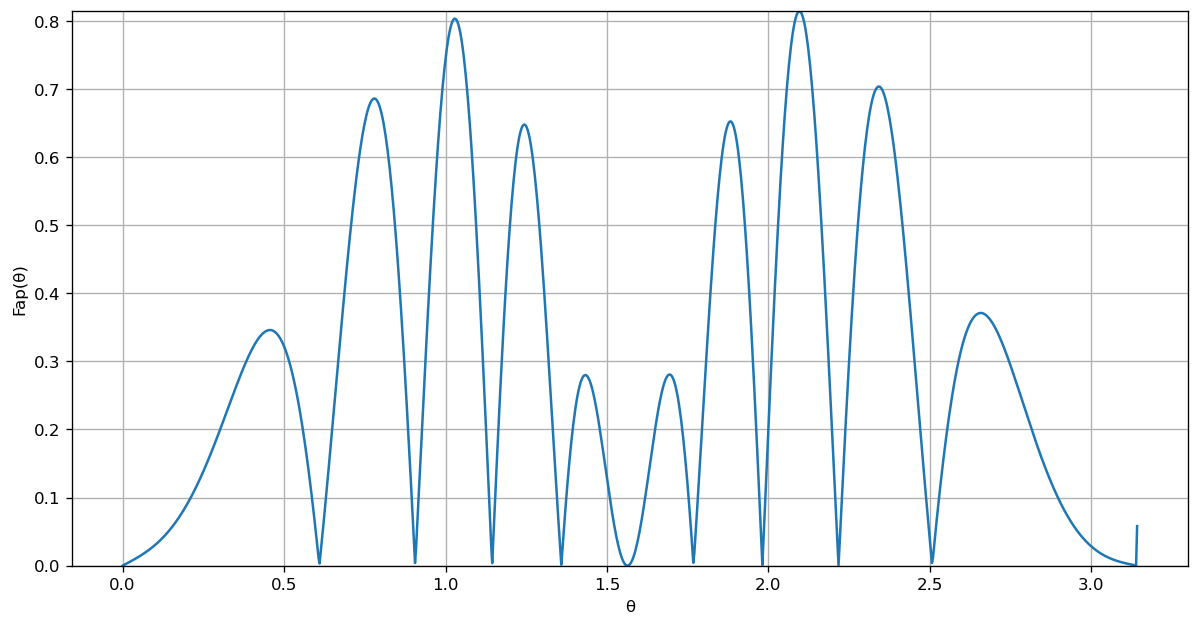

In [24]:
theta = np.linspace(0, np.pi, 1000)
N1 = 7
d1 = 22.5*10e-3

N2 = 4
d2 = 45*10e-3

epsilon_1 = 0.0073
k = 2*np.pi/lmb

# Определим F1_theta_1 с обработкой деления на 0
sin_theta = np.sin(theta)
cos_theta = np.cos((np.pi / 2) * np.cos(theta))

F1_theta_1 = np.where(sin_theta != 0, cos_theta / sin_theta, 0.0001)  # или np.nan, если хотите другой 

Fn_theta_1 = np.sin(((N1 * k * d1)/2)*(np.cos(theta) - epsilon_1)) / N1 * np.sin(((k * d1)/2)*(np.cos(theta) - epsilon_1)) 

F1_nom = F1_theta_1/np.max(F1_theta_1)
Fn_nom = Fn_theta_1/np.max(Fn_theta_1)

F_AP1 = F1_nom * Fn_nom
plt.figure(figsize=(12, 6),dpi = 120)
# График сигнала во временной области
plt.grid(True)
plt.plot(theta, abs(F_AP1))
plt.xlabel('\u03B8')
plt.ylabel('Fap(\u03B8)')
plt.ylim(0, np.max(F_AP1))  # Установка лимитов по оси Y
plt.show()

Должен быть написан номер (бригады - номер антенной решётки) на антенне

Снять ДН для 3 антенных решёток

Находим направление главного максимума. В однму сторону берём 40 градусов и в другую сторону берём 40 градусов и в этом диапазоне снимаем ДН.

__Обратить внимание__: главный лепесток нужно снимать как можно точнее и положения минимумов.

Антенные решётки принимают линейную поляризацию. Поверхностный ток пересекает щель и в этом месте он разрывается, возникает вектор Е напряжённости поля, который соединяет разрыв в щели. 

Генератор 10Мгц

__Факультатив__: Антенная решётка с винтами. 

Снимаем генератор, и ставим антенну щелями вниз, двигаем зонд. Кабель подключаем к вольтметру и снимаем распределение электрического поля вдоль щели, двигая антенну. Один винт влияет на все остальные. Двигая туда сюда эту каретку можно добиться хорошего распрееления поля. 

__Вольтметр должен показывать под щелями одинаковое значение.__

Уровень главного и неглавного лепестка сильно отличаются и поэтому надо делать более чувствительным вольтметр.


Антенна 1: a = 19.0 мм

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


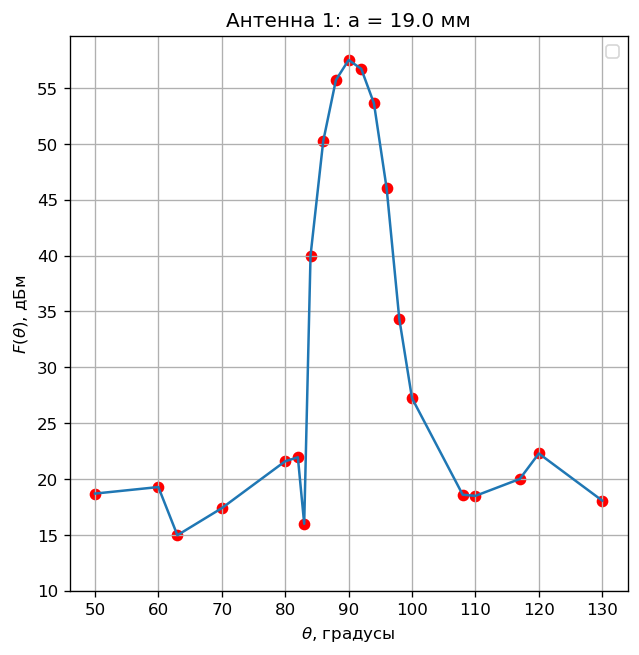

In [ ]:
theta_exp_grad = np.array([50, 60, 63, 70, 80, 82,  83,  84,  86,  88,  90,  92,  94,  96,  98, 100,108,110,117,120,130]) 
r_exp = 10e-3 * np.array([8.6,9.2,5.6,7.4,12, 12.5,6.3,100, 325, 610, 750, 685, 480, 200, 52, 23, 8.5,8.4, 10, 13, 8])  
# r_exp значения в миливольтах

dbm_values = 20 * np.log10(r_exp / 10e-3) # нормировка на милливольты, получаю ДБм

plt.figure(figsize=(6, 6), dpi=120)
plt.title("Антенна 1: a = 19.0 мм")
plt.xticks(np.arange(np.min(theta_exp_grad), np.max(theta_exp_grad) + 10, 10))
plt.plot(theta_exp_grad, dbm_values)
plt.grid(True)
plt.scatter(theta_exp_grad, dbm_values, color='red')
plt.xlabel(r"$\theta$, градусы")
plt.yticks(np.arange(10,60,5))
plt.ylabel(r'$F(\theta)$, дБм')
plt.legend()
plt.show()


https://proproprogs.ru/modules/matplotlib-delaem-logarifmicheskiy-masshtab-u-koordinatnyh-osey

2 антенна

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


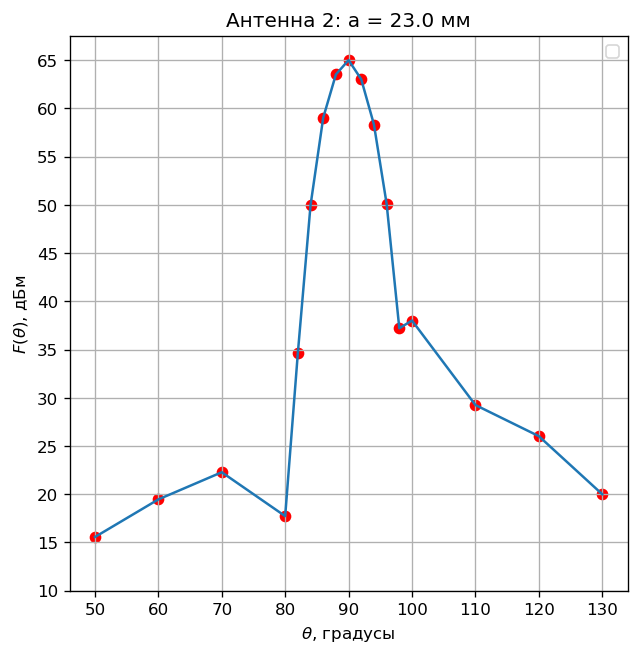

In [69]:
theta_exp_grad = np.array([50, 60, 70, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 110, 120, 130]) 
r_exp = 10e-3 * np.array([6, 9.4, 13, 7.7, 54, 315, 895, 1500, 1780, 1415, 825, 320, 72.5, 79.5, 29, 20, 10])
# r_exp значения в миливольтах

dbm_values = 20 * np.log10(r_exp / 10e-3) # нормировка на милливольты, получаю ДБм

plt.figure(figsize=(6, 6), dpi=120)
plt.title("Антенна 2: a = 23.0 мм")
plt.xticks(np.arange(np.min(theta_exp_grad), np.max(theta_exp_grad) + 10, 10))
plt.plot(theta_exp_grad, dbm_values)
plt.grid(True)
plt.scatter(theta_exp_grad, dbm_values, color='red')
plt.xlabel(r"$\theta$, градусы")
plt.yticks(np.arange(10,70,5))
plt.ylabel(r'$F(\theta)$, дБм')
plt.legend()
plt.show()



3 антенна

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


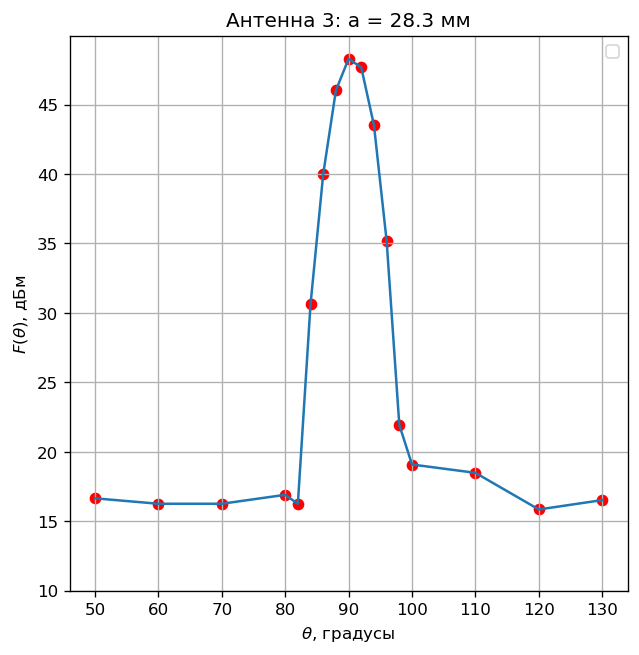

In [71]:
theta_exp_grad = np.array([50, 60, 70, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 110, 120, 130]) 
r_exp = 10e-3 * np.array([6.8, 6.5, 6.5, 7, 6.5, 34, 100, 200, 260, 242, 150, 57.5, 12.5, 9, 8.4, 6.2, 6.7])
# r_exp значения в миливольтах

dbm_values = 20 * np.log10(r_exp / 10e-3) # нормировка на милливольты, получаю ДБм

plt.figure(figsize=(6, 6), dpi=120)
plt.title("Антенна 3: a = 28.3 мм")
plt.xticks(np.arange(np.min(theta_exp_grad), np.max(theta_exp_grad) + 10, 10))
plt.plot(theta_exp_grad, dbm_values)
plt.grid(True)
plt.scatter(theta_exp_grad, dbm_values, color='red')
plt.xlabel(r"$\theta$, градусы")
plt.yticks(np.arange(10,50,5))
plt.ylabel(r'$F(\theta)$, дБм')
plt.legend()
plt.show()
